<a href="https://colab.research.google.com/github/faizer1989/AI_recipes/blob/main/Industrial_Quality_Control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

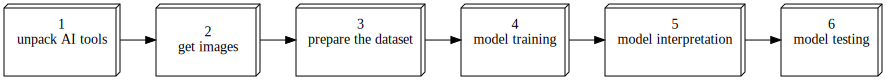

In [20]:
#@title ##ML workflow
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"' + s + ' forcelabels=true; }')
gv('''ordering=in
problem[shape=box3d width=1 height=1 label="1️⃣\n unpack AI tools \n🔨"]
dataset[shape=box3d width=1 height=1 label="2️⃣\n 📸get images \n"]
transform[shape=box3d width=1 height=1 label="3️⃣\n prepare the dataset \n🧪"]
train[shape=box3d width=1 height=1 label="4️⃣\n model training \n🧮"]
eval[shape=box3d width=1 height=1 label="5️⃣\n model interpretation \n🩺"]
predict[shape=box3d width=1 height=1 label="6️⃣\n model testing \n🛴"]
problem->dataset->transform->train->eval->predict''')

In [21]:
#@title ##1️⃣ unpack AI tools 🔨
!pip install -Uqq fastbook
!pip install -Uqq unpackai
from unpackai.utils import clean_error_img
from fastbook import *
from fastai.vision.widgets import *
from pathlib import Path


## <font color='red'>IMPORTANT</font> 

***After you executed step 1️⃣ , re-start the runtime in order to avoid the erros. You can press: `Ctrl + M + .` on your keyboard (Smash all three keys together. Execute the step 1️⃣ and enjoy the building your your image classifier***. 




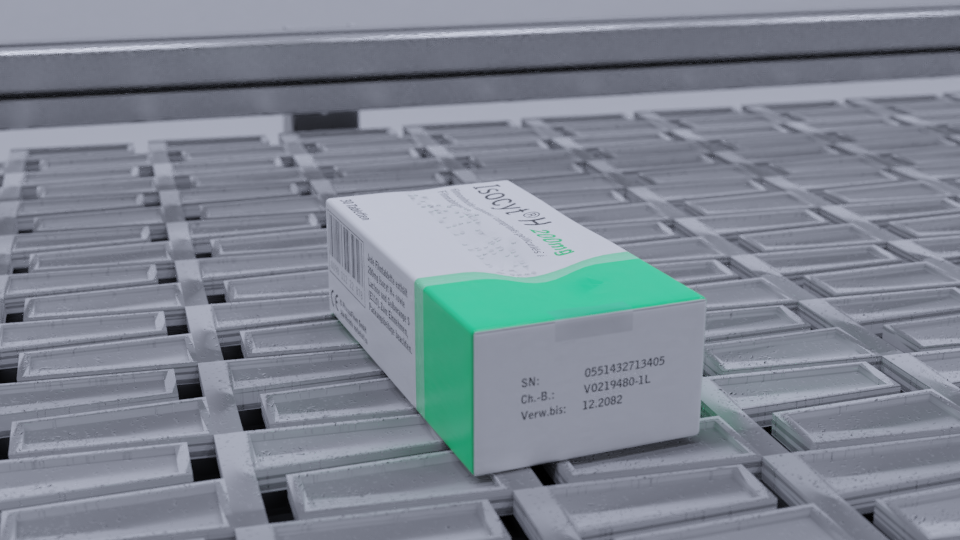

In [22]:
#@title ##2️⃣ get images 📸
data = untar_data('https://www.dropbox.com/s/1s8mxtuich42bqk/Industrial_quality_control.zip?dl=1')
# make a list of all images 
list_damaged = [f for f in (data / 'damaged').iterdir() if f.is_file()]

# pick one and show it
picked_image = 0
im = Image.open(list_damaged[picked_image])
im.to_thumb(1024,1024)

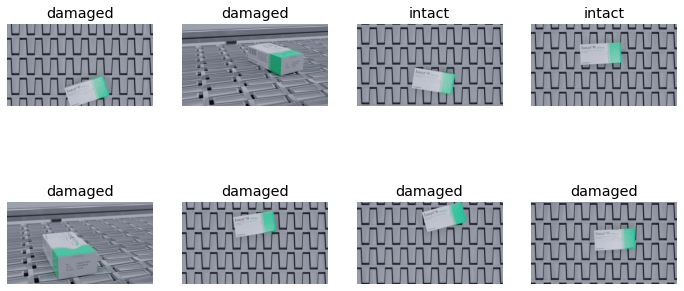

In [23]:
#@title ##3️⃣ prepare the dataset 🧪
fns = get_image_files(data)
qc = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label)

dls = qc.dataloaders(data, bs=8)
dls.valid.show_batch(max_n=8, nrows=2)

In [24]:
#@title ##4️⃣ model training 🧮
#check that your GPU is active before training.
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.524237,1.150806,0.550000,00:59


epoch,train_loss,valid_loss,accuracy,time
0,1.056136,0.724757,0.662500,01:21
1,0.957740,0.746677,0.725000,01:20
2,0.805910,0.930182,0.687500,01:20
3,0.752739,0.755039,0.687500,01:20
4,0.574074,0.726588,0.737500,01:20
5,0.508986,0.568203,0.737500,01:20
6,0.450066,0.452099,0.837500,01:20
7,0.365197,0.424240,0.862500,01:20
8,0.278133,0.329881,0.850000,01:20
9,0.263329,0.390575,0.837500,01:20


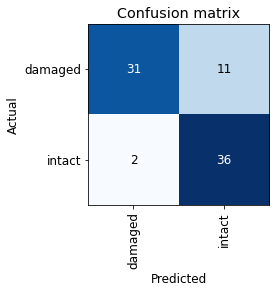

In [25]:
#@title ##5️⃣ model interpretation: confustion matrix 🩺
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

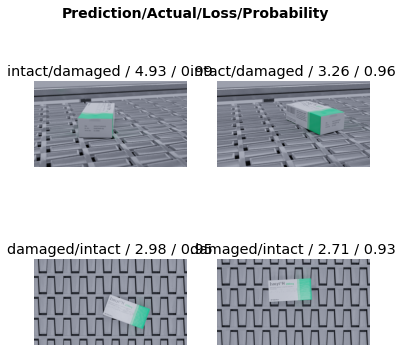

In [26]:
#@title ##5️⃣model interpretation: top losses 🩺
interp.plot_top_losses(k=4)

In [27]:
#@title ##6️⃣ model testing 🛴
uploader = widgets.FileUpload()
output = widgets.Output()
classify = widgets.Button(description='Classify')
prediction = widgets.Label()

def on_click_classify(change):
    img = PILImage.create(uploader.data[-1])
    output.clear_output()
    with output: 
      display(img.to_thumb(254,254))
    pred, pred_idx, probs = learn.predict(img)
    prediction.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

classify.on_click(on_click_classify)

VBox([widgets.Label('Select your image!'), 
      uploader, classify, output, prediction])